# Audio books business case

### Business Problem

We have data from an audio books app.  Each customer in the database has made a purchase at least once, that's why he/she is in the database. We want to create a machine learning algorithm based on our available data, that can predict if a customer will buy again from the Audiobook company.
The main idea is that if a customer has a low probability of coming back, there is no reason to spend any money on advertising to him/her. If we can focus our efforts solely on customers that are likely to convert again, we can make great savings.

We have a .csv file summarizing the data. There are several variables:
* <b>ID</b> - ID of the customer(completely arbitrary number, useless for modeling)
* <b>Overall book length</b> - The sum of the minute length of all purchases
* <b>Average book length</b> - The average of the minute length of all purchases
* <b>Overall price paid</b> - The sum of all purchases
* <b>Average price paid</b> - The average of all purchases
* <b>Review</b> - A boolean variable, whether the customer left a review
* <b>Review(1-10)</b> - Review of the customer from 1 to 10, if there is one
* <b>Total minutes listened</b> - The sum of all minutes listened
* <b>Completion</b> - A value between 0 and 1, describing the percentage of completion
* <b>Support requests</b> - Number of support requests(everything from forgotten password to assistance for using the App)
* <b>Last visited minus the purchase date</b> - Measured in days

The targets are Boolean values (0 or 1). We are taking a period of 2 years in our inputs, and the next 6 months as targets. So, in fact, we are predicting if: based on the last 2 years of activity and engagement, a customer will convert in the next 6 months.If they don't convert in that time, chances are they have gone to a competitor or didn't like the Audiobook way of digesting information.

The task is to create a machine learning algorithm, which is able to predict if a customer will buy again. 
This is a classification problem, with two classes: won't buy and will buy, represented by 0s and 1s. 

In [1]:
#!pip install autoviz

In [2]:
import pandas as pd
import numpy as np
from autoviz.AutoViz_Class import AutoViz_Class
from sklearn import preprocessing

Imported AutoViz_Class version: 0.0.81. Call using:
    from autoviz.AutoViz_Class import AutoViz_Class
    AV = AutoViz_Class()
    AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=0,
                            lowess=False,chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30)
Note: verbose=0 or 1 generates charts and displays them in your local Jupyter notebook.
      verbose=2 saves plots in your local machine under AutoViz_Plots directory and does not display charts.


In [3]:
raw_data = pd.read_csv('audiobooks_df.csv')

In [4]:
raw_data.head()

,id,book_length_sum,book_length_avg,price_paid_sum,price_paid_avg,review_bool,review,total_minutes,completion,support_requests,lv_minus_pd,target
0,994,1620.0,1620,19.73,19.73,1,10.00,0.99,1603.8,5,92,0
1,1143,2160.0,2160,5.33,5.33,0,8.91,0.00,0.0,0,0,0
2,2059,2160.0,2160,5.33,5.33,0,8.91,0.00,0.0,0,388,0
3,2882,1620.0,1620,5.96,5.96,0,8.91,0.42,680.4,1,129,0
4,3342,2160.0,2160,5.33,5.33,0,8.91,0.22,475.2,0,361,0


In [5]:
raw_data.shape

(14084, 12)

In [6]:
raw_data.isnull().sum()

id                  0
book_length_sum     0
book_length_avg     0
price_paid_sum      0
price_paid_avg      0
review_bool         0
review              0
total_minutes       0
completion          0
support_requests    0
lv_minus_pd         0
target              0
dtype: int64

In [7]:
raw_data.corr()

,id,book_length_sum,book_length_avg,price_paid_sum,price_paid_avg,review_bool,review,total_minutes,completion,support_requests,lv_minus_pd,target
id,1.000000,0.011339,-0.002200,0.005119,-0.003089,0.001200,-0.005921,0.005988,0.011044,0.004860,0.012606,-0.010613
book_length_sum,0.011339,1.000000,0.733511,-0.021481,-0.053426,-0.031521,0.015277,-0.082782,0.099781,0.017827,0.068056,-0.064779
book_length_avg,-0.002200,0.733511,1.000000,-0.021724,0.222368,-0.032476,0.018962,-0.133235,0.008603,0.027886,0.091902,0.257012
price_paid_sum,0.005119,-0.021481,-0.021724,1.000000,0.902491,0.079810,0.013021,0.078470,0.070361,0.025916,0.029087,0.015352
price_paid_avg,-0.003089,-0.053426,0.222368,0.902491,1.000000,0.069566,0.017437,0.028370,0.021910,0.031203,0.051447,0.195741
review_bool,0.001200,-0.031521,-0.032476,0.079810,0.069566,1.000000,0.002868,0.467369,0.456494,0.228880,0.217197,0.011848
review,-0.005921,0.015277,0.018962,0.013021,0.017437,0.002868,1.000000,0.045380,0.058668,0.069279,0.021040,0.012738
total_minutes,0.005988,-0.082782,-0.133235,0.078470,0.028370,0.467369,0.045380,1.000000,0.921608,0.303231,0.235986,-0.226386
completion,0.011044,0.099781,0.008603,0.070361,0.021910,0.456494,0.058668,0.921608,1.000000,0.332335,0.259639,-0.222368
support_requests,0.004860,0.017827,0.027886,0.025916,0.031203,0.228880,0.069279,0.303231,0.332335,1.000000,0.107869,0.030410


### Visualizing the dataset with AutoViz

In [8]:
AV = AutoViz_Class()

Shape of your Data Set: (14084, 12)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  6
    Number of Integer-Categorical Columns =  3
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  2
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  1
    Number of Columns to Delete =  0
    12 Predictors classified...
        This does not include the Target column(s)
        1 variables removed since they were ID or low-information variables
Number of All Scatter Plots = 21


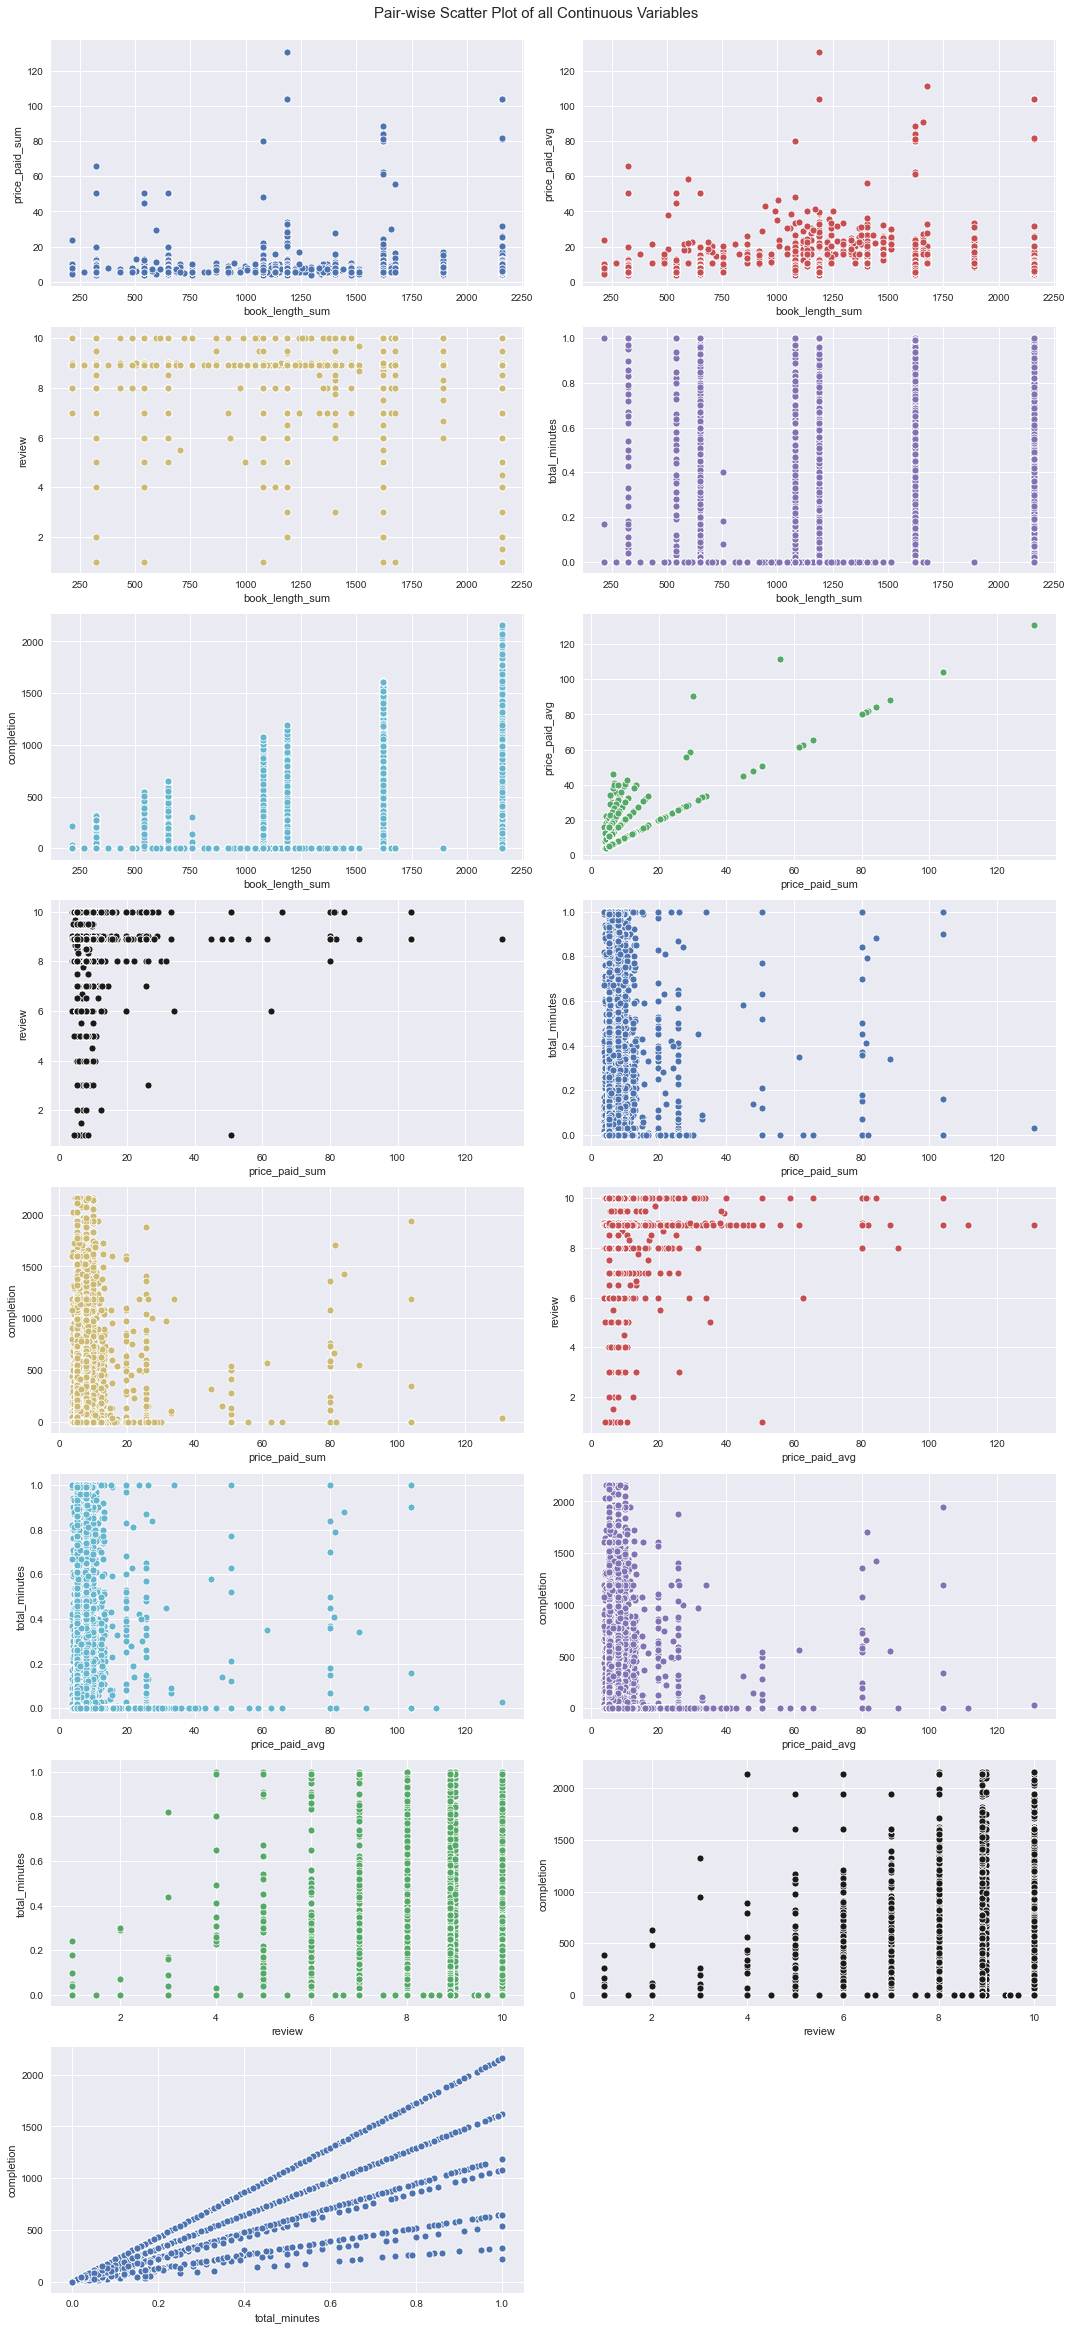

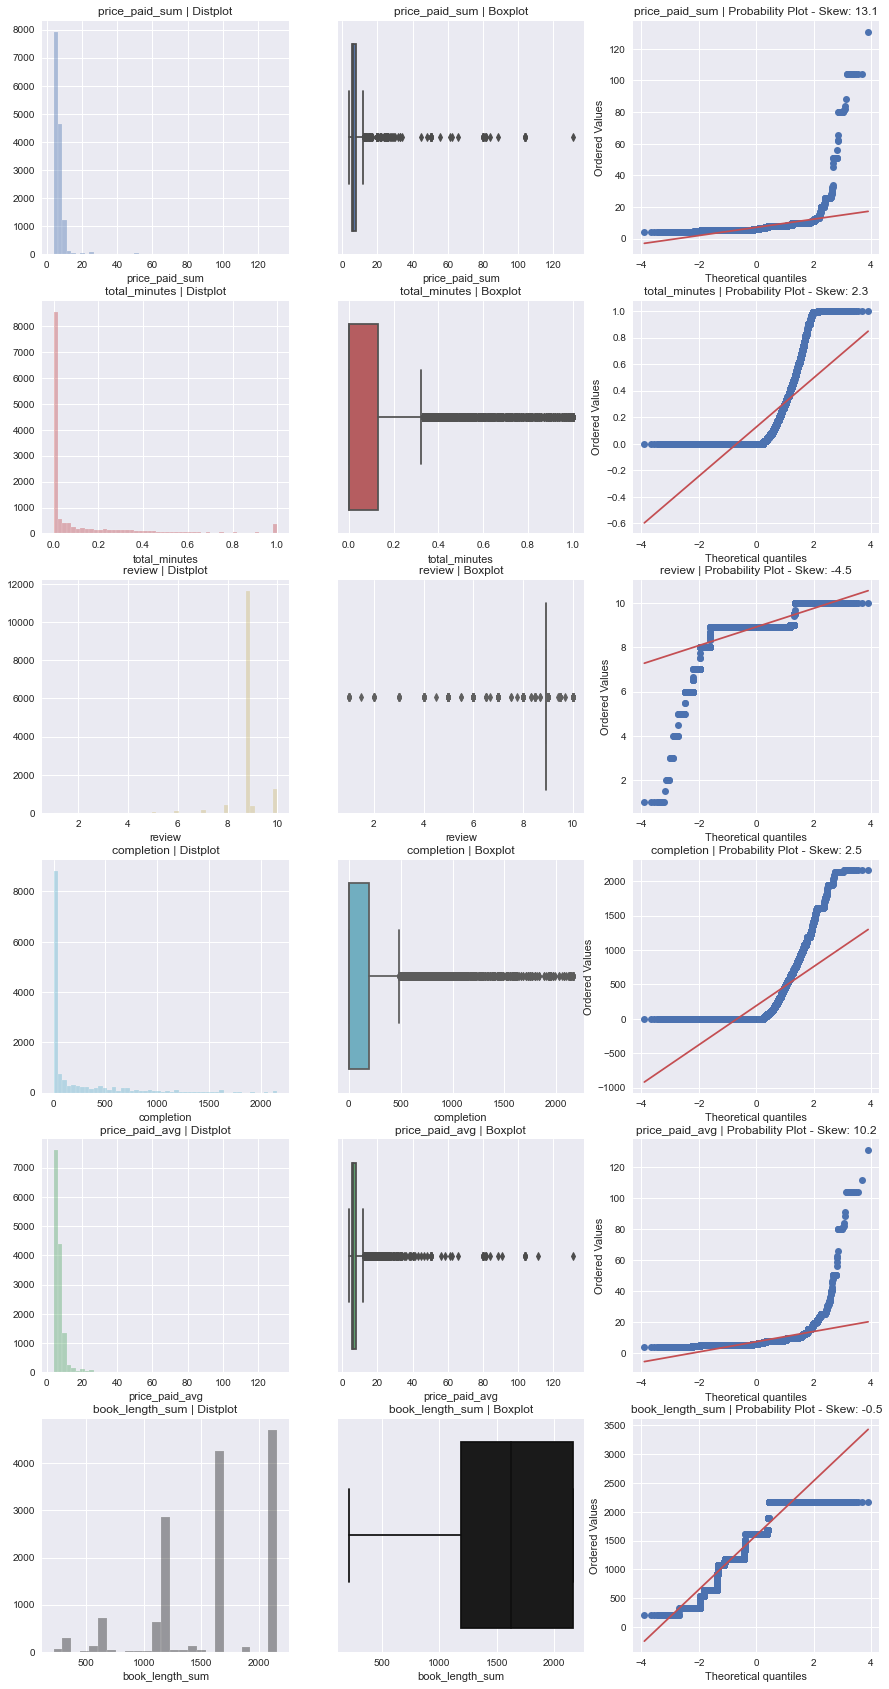

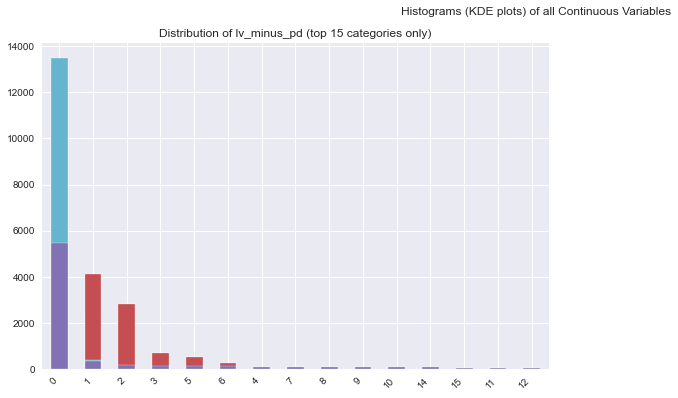

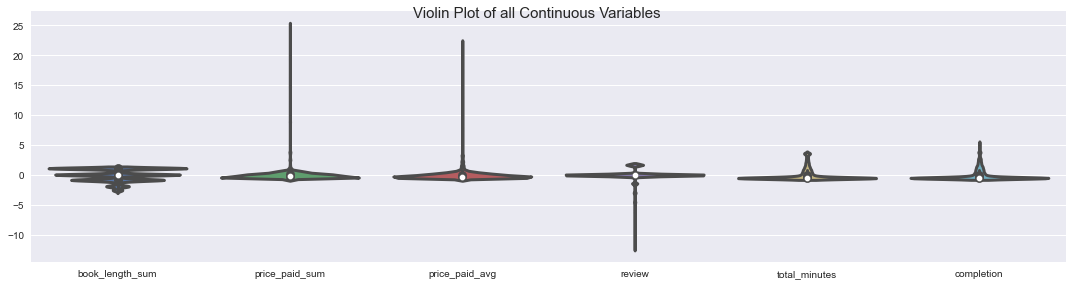

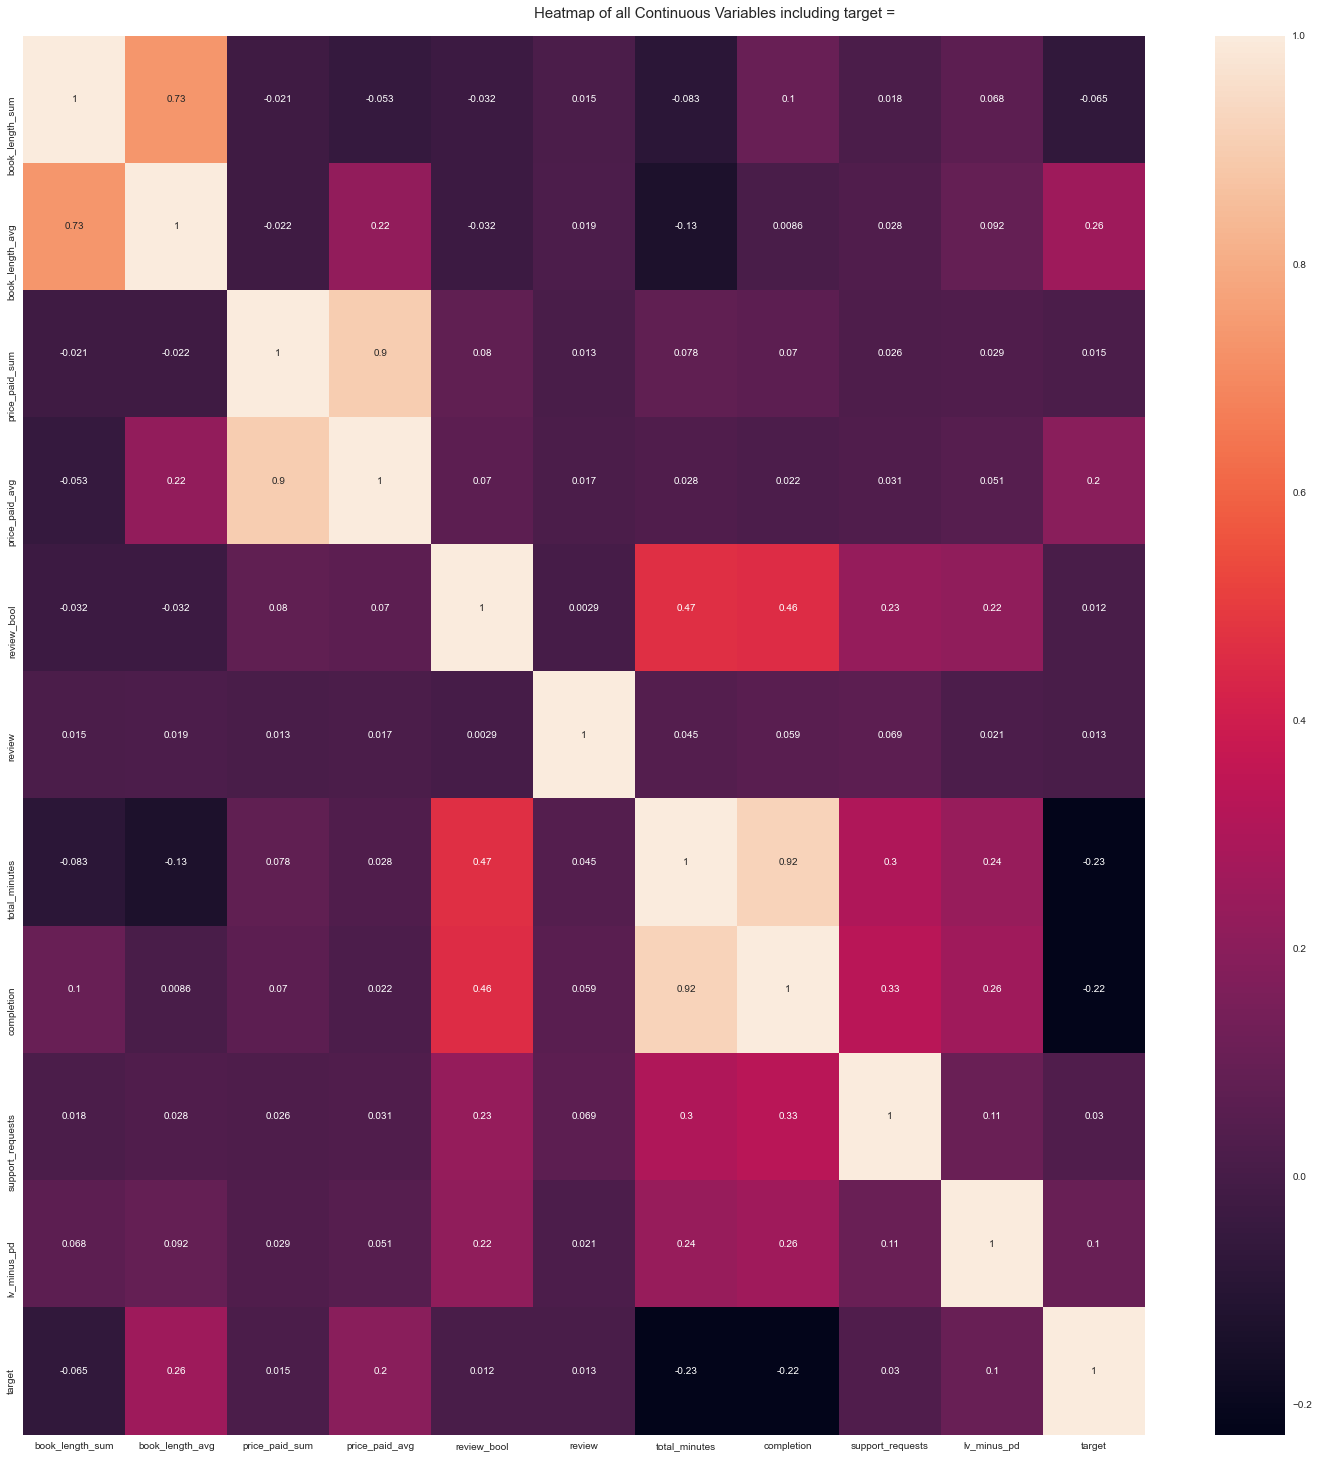

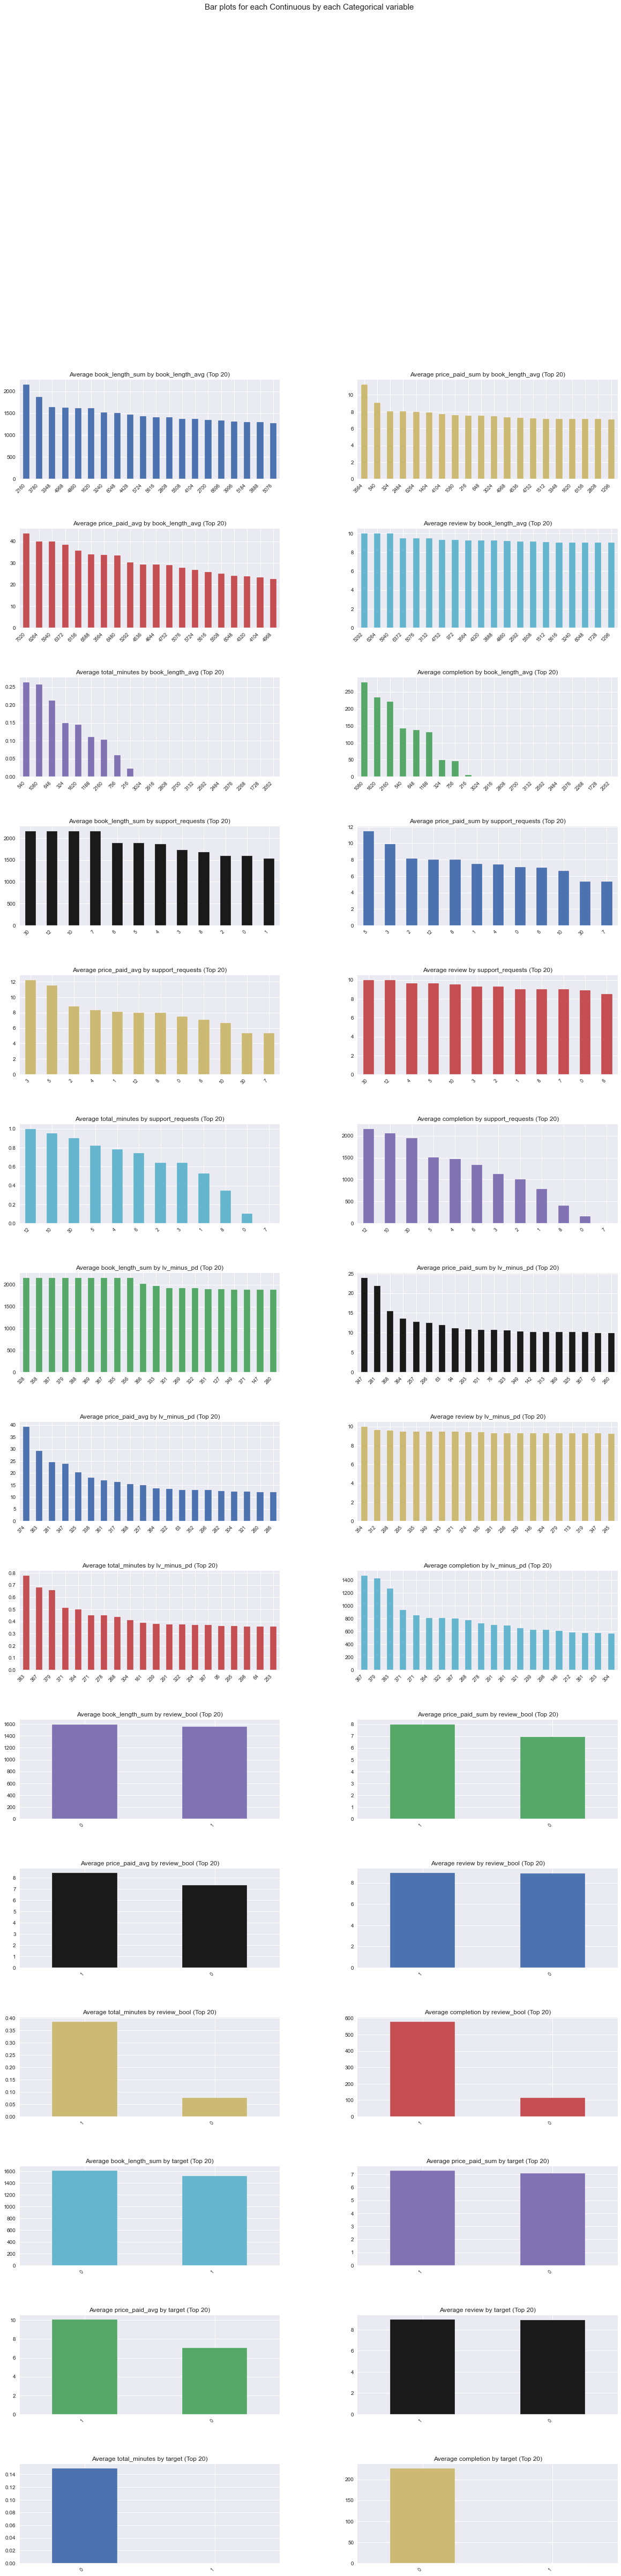

Time to run AutoViz (in seconds) = 27.755

 ###################### VISUALIZATION Completed ########################


In [9]:
filename = 'audiobooks_df.csv'
sep = ","
dft = AV.AutoViz(
    filename,
    depVar="",
    dfte=None,
    header=0,
    verbose=0,
    lowess=False,
    chart_format="svg",
    max_rows_analyzed=150000,
    max_cols_analyzed=30,
)

### Data Preprocessing. Balance the dataset. Creating 3 datasets: training, validation, and test. Save the newly created sets in a tensor friendly format (.npz)

In [10]:
raw_csv_data = np.loadtxt('Audiobooks_data.csv', delimiter=',')

In [11]:
## The inputs are all columns in the csv, except for the first one [:,0] and the last one [:,-1], which are the targets
unscaled_inputs_all = raw_csv_data[:,1:-1]
targets_all = raw_csv_data[:,-1]

##### Balance the dataset

In [12]:
# Count how many targets are 1 (meaning that the customer did convert)
num_one_targets = int(np.sum(targets_all))

# Set a counter for targets that are 0 (meaning that the customer did not convert)
zero_targets_counter = 0

# We want to create a "balanced" dataset, so we will have to remove some input/target pairs.
# Declaring a variable that will do that:
indices_to_remove = []

# Count the number of targets that are 0. Once there are as many 0s as 1s, mark entries where the target is 0.
for i in range(targets_all.shape[0]):
    if targets_all[i] == 0:
        zero_targets_counter += 1
        if zero_targets_counter > num_one_targets:
            indices_to_remove.append(i)

# Creating two new variables, one that will contain the inputs, and one that will contain the targets.
# Deleting all indices that are marked "to remove" in the loop above.
unscaled_inputs_equal_priors = np.delete(unscaled_inputs_all, indices_to_remove, axis=0)
targets_equal_priors = np.delete(targets_all, indices_to_remove, axis=0)

##### Standardizing the inputs

In [13]:
scaled_inputs = preprocessing.scale(unscaled_inputs_equal_priors)

##### Shuffling the data

In [14]:
shuffled_indices = np.arange(scaled_inputs.shape[0])
np.random.shuffle(shuffled_indices)
# Using the shuffled indices to shuffle the inputs and targets.
shuffled_inputs = scaled_inputs[shuffled_indices]
shuffled_targets = targets_equal_priors[shuffled_indices]

##### Train, Validation and Test split

In [15]:
# Count the total number of samples
samples_count = shuffled_inputs.shape[0]
# Count the samples in each subset, assuming we want 80-10-10 distribution of training, validation, and test.
train_samples_count = int(0.8 * samples_count)
validation_samples_count = int(0.1 * samples_count)
# The 'test' dataset contains all remaining data.
test_samples_count = samples_count - train_samples_count - validation_samples_count
# Create variables that record the inputs and targets for training
train_inputs = shuffled_inputs[:train_samples_count]
train_targets = shuffled_targets[:train_samples_count]
# Create variables that record the inputs and targets for validation.
validation_inputs = shuffled_inputs[train_samples_count:train_samples_count+validation_samples_count]
validation_targets = shuffled_targets[train_samples_count:train_samples_count+validation_samples_count]
# Create variables that record the inputs and targets for test.
test_inputs = shuffled_inputs[train_samples_count+validation_samples_count:]
test_targets = shuffled_targets[train_samples_count+validation_samples_count:]
# Print the number of targets that are 1s, the total number of samples, and the proportion for training, validation, and test.
print(np.sum(train_targets), train_samples_count, np.sum(train_targets) / train_samples_count)
print(np.sum(validation_targets), validation_samples_count, np.sum(validation_targets) / validation_samples_count)
print(np.sum(test_targets), test_samples_count, np.sum(test_targets) / test_samples_count)

1768.0 3579 0.49399273540095
228.0 447 0.5100671140939598
241.0 448 0.5379464285714286


##### Save the three datasets in .npz format

In [16]:
np.savez('Audiobooks_data_train', inputs=train_inputs, targets=train_targets)
np.savez('Audiobooks_data_validation', inputs=validation_inputs, targets=validation_targets)
np.savez('Audiobooks_data_test', inputs=test_inputs, targets=test_targets)

In [17]:
npz_train = np.load('Audiobooks_data_train.npz')
# extracting the inputs and outputs using the keywords under which they were saved
train_inputs = npz_train['inputs'].astype(np.float)
train_targets = npz_train['targets'].astype(np.int)
npz_val = np.load('Audiobooks_data_validation.npz')
validation_inputs, validation_targets = npz_val['inputs'].astype(np.float), npz_val['targets'].astype(np.int)
npz_test = np.load('Audiobooks_data_test.npz')
test_inputs, test_targets = npz_test['inputs'].astype(np.float), npz_test['targets'].astype(np.int)